# Download Sample image

In [1]:
import requests

def download_sample_image(url: str, image_name:str):
    response = requests.get(url)
    file = open("../images/{}".format(image_name), "wb")
    file.write(response.content)
    file.close()

In [2]:
download_sample_image("https://img.webmd.com/dtmcms/live/"
                      "webmd/consumer_assets/site_images/article_thumbnails/"
                      "other/dog_cool_summer_slideshow/1800x1200_dog_cool_summer_other.jpg",
                      "dog.jpg")

# See Image

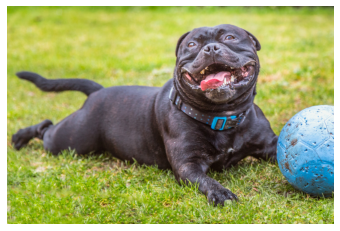

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../images/dog.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

# Apply Sobel operators

## Using kornia

In [4]:
from kornia import filters
import torch
import numpy as np

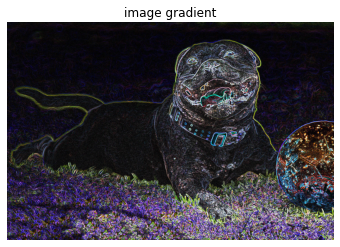

In [5]:
img_rgb = torch.from_numpy(img)/255.0
img_rgb_temp: torch.Tensor = np.transpose(img_rgb, (2, 0, 1)).unsqueeze(0)
G = filters.Sobel(normalized=False)(img_rgb_temp).squeeze()
G = np.transpose(G, (1, 2, 0)).clip(0, 1)
plt.title("image gradient")
plt.imshow(G, cmap="gray")
plt.axis("off")
plt.show()

## Using convolutions operators

In [6]:
import torch.nn.functional as F
from torchvision import transforms

In [7]:
x_kernel = torch.tensor([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype = torch.float32)
y_kernel = torch.tensor([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype = torch.float32)

## Convert to gray scale and apply

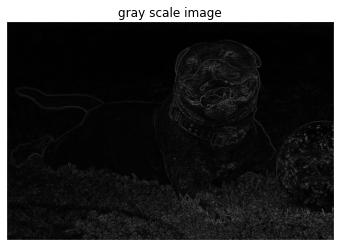

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = torch.from_numpy(img_gray)/255.0

h, w = img_gray.shape
img_gray = img_gray.view(1, 1, h, w)
Gx = F.conv2d(img_gray, x_kernel.view(1, 1, 3, 3), padding=1)
Gy = F.conv2d(img_gray, y_kernel.view(1, 1, 3, 3), padding=1)
G = torch.sqrt(Gx**2 + Gy**2).squeeze(0)
plt.title("gray scale image")
plt.imshow(G.squeeze(0), cmap="gray")
plt.axis("off")
plt.show()

## Apply to each channel

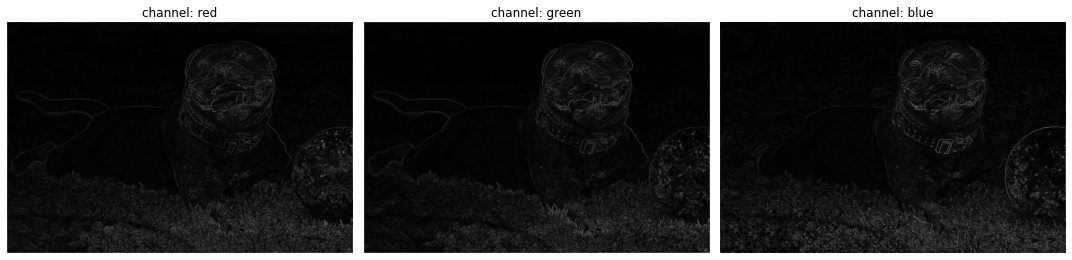

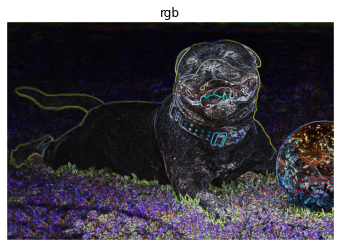

In [9]:
img_rgb = torch.from_numpy(img)/255.0

h, w, c = img_rgb.shape

img_rgb = np.transpose(img_rgb, (2, 0, 1))
red = img_rgb.view(1, c, h, w)[:, 0, :, :].unsqueeze(0)
green = img_rgb.view(1, c, h, w)[:, 1, :, :].unsqueeze(0)
blue = img_rgb.view(1, c, h, w)[:, 2, :, :].unsqueeze(0)

rgb = [red, green, blue]
rgb_sobel_filter = []
rgb_text = ["red", "green", "blue"]
plt.figure(figsize=(15, 10), tight_layout=True)
for idx_plot, channel in enumerate(rgb):
    plt.subplot(1, 3, idx_plot + 1)
    Gx = F.conv2d(channel, x_kernel.view(1, 1, 3, 3), padding=1)
    Gy = F.conv2d(channel, y_kernel.view(1, 1, 3, 3), padding=1)
    G = torch.sqrt(Gx**2 + Gy**2).squeeze(0).squeeze(0)
    # add filter for each channel
    rgb_sobel_filter.append(G)
    plt.title("channel: {}".format(rgb_text[idx_plot]))
    plt.imshow(G, cmap="gray")
    plt.axis("off")
plt.show()

rgb_sobel_filter = np.transpose(torch.stack(rgb_sobel_filter), (1, 2, 0)).clip(0, 1)
plt.title("rgb")
plt.imshow(rgb_sobel_filter, cmap="gray")
plt.axis("off")
plt.show()

# Laplacian Filter

torch.Size([3, 1200, 1800])


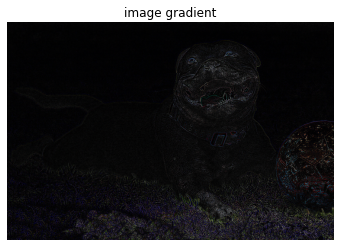

In [12]:
img_rgb = torch.from_numpy(img)/255.0
img_rgb_temp: torch.Tensor = np.transpose(img_rgb, (2, 0, 1)).unsqueeze(0)
G = filters.Laplacian(kernel_size=3, normalized=False)(img_rgb_temp).squeeze()
print(G.shape)
G = np.transpose(G, (1, 2, 0)).clip(0, 1)
plt.title("image gradient")
plt.imshow(G, cmap="gray")
plt.axis("off")
plt.show()